# Assignment 2: Iterative-Deepening Search

*Pratik Warade*

## Overview

In this assignment, I have implemented the iterative-deepening search algorithm and applied it to " 8-puzzle " and " The Water Jug " problem .

## Understanding Of Algorithms

### Depth Limited Search :
Since the DFS search can lead to incomplete solutions due to depth unbounded trees (going down a path forever), depth-limited search ensures that the traversal along the depth of a path is limited to a certain pre-determined depth limit. For example, if we can assume that the goal node should be found within the depth limit of 5 from root node, in this case DLS would go down each path up to depth=5 only and search the tree until it finds the goal node eliminating the infinite-path problem found in general DFS search strategy. The problem with DLS is that it is hard to assume a best pre-determined depth-limit without affecting the solution.

##### Performance Measure :
* Completeness :
  * The limited path introduces another problem which is the case when we choose `l < d`, in which is our DLS will never reach a goal, in this case we can say that DLS is not complete.



* Optimallity :
 * One can view DFS as a special case of the depth DLS, that DFS is DLS with `l = infinity.`
  * DLS is not optimal even if `l > d.`
  
  
* `Time Complexity :  O(b^l)`
 
* `Space Complexity: O(b^l)`



### Iterative Deepening Search :
This is another search strategy usually used as a combination with DFS which helps in finding the best depth-limit (which can be useful for applying depth-limited search). It starts off with depth=0 (only having the root node) and then gradually increasing the depth at each iteration until the goal node has been reached. This strategy tries to combine the good features of both BFS and DFS. As in DFS, its memory requirements are less and like BFS it is a complete algorithm given the branching factor from each node is a finite number and the path cost is a non-decreasing function of the depth of the node. This method is preferred for large search problems since it combines all the goodness of both BFS and DFS and tries to strike a balance between them allowing for better memory requirements and complete and optimal solution finding.



<img src="http://www.cs.colostate.edu/~pswarade/pratik_imp/iddfs2.png">



#### Performance Measure :
* Completeness:
 * IDS is like BFS, is complete when the branching factor b is finite.


* Optimality:
 * IDS is also like BFS optimal when the steps are of the same cost.


* Time Complexity:
 *One may find that it is wasteful to generate nodes multiple times, but actually it is not that costly compared to BFS, that is because most of the generated nodes are always in the deepest level reached, consider that we are searching a binary tree and our depth limit reached 4, the nodes generated in `last level = 2^4 = 16`, the nodes generated in all nodes before `last level = 20 + 21 + 22 + 23= 15`
 
 
* Imagine this scenario, we are performing IDS and the depth limit reached depth d, now if you remember the way IDS expands nodes, you can see that nodes at depth d are generated once, nodes at depth d-1 are generated 2 times, nodes at depth d-2 are generated 3 times and so on, until you reach depth 1 which is generated d times, we can view the total number of generated nodes in the worst case as:
 *`N(IDS) = (b)d + (d – 1)b2 + (d – 2)b3 + …. + (2)bd-1 + (1)bd = O(bd)`


* If this search were to be done with BFS, the total number of generated nodes in the worst case will be like:
 *`N(BFS) = b + b2 + b3 + b4 + …. bd + (bd + 1 – b) = O(bd + 1)`


* If we consider a realistic numbers, and use b = 10 and d = 5, then number of generated nodes in BFS and IDS will be like
 *`N(IDS) = 50 + 400 + 3000 + 20000 + 100000 = 123450`
 *`N(BFS) = 10 + 100 + 1000 + 10000 + 100000 + 999990 = 1111100`

* BFS generates like 9 time nodes to those generated with IDS.


* Space Complexity:
 *IDS is like DFS in its space complexity, taking O(bd) of memory.


...[https://mhesham.wordpress.com/tag/iterative-deepening-depth-first-search/ ]


## 8- Puzzle :
Given a 3×3 board with 8 tiles (every tile has one number from 1 to 8) and one empty space. The objective is to place the numbers on tiles to match final configuration using the empty space. We can slide four adjacent (left, right, above and below) tiles into the empty space
### Solution to solve the 8-puzzle

Following solution implements the state of the puzzle as a list of integers. 0 represents the empty position. 
<img src="http://www.cs.colostate.edu/~pswarade/pratik_imp/8puzle.png">

###### Required functions for the 8-puzzle


In [1]:
#REQUIRED IMPORTS
import time
from numpy import *
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import pylab as pylab
import matplotlib.image as mpimg
import numpy as np
from IPython import display
import copy

`findBlank_8p(state)`: returns the row and column index for the location of the blank (the 0 value).

In [2]:
def findBlank_8p(startState):
    n=3
    #covert list in two dimensinal vector
    state=[startState[i:i+n] for i in range(0, len(startState), n)]
    # state now is [[1, 6, 3], [4, 2, 5], [0, 7, 8]]
    #geting tuple by enumerating over rows and coloumn elements
    blank=[(ix,iy) for ix, row in enumerate(state) for iy, i in enumerate(row) if i == 0]    
    return ((blank[0]))

`actionsF_8p(state)`: returns a list of up to four valid actions that can be applied in `state`. Return them in the order `left`, `right`, `up`, `down`, though only if each one is a valid action.

In [3]:
def actionsF_8p(startState):
        #get the index of blank number and return moves that are possible
        i=startState.index(0)
        if (i==0):
            return(['right','down'])
        if(i==1):
            return(['left','right','down'])
        if(i==2):
            return(['left','down'])
        if(i==3):
            return(['right','up','down'])
        if(i==4):
            return(['left','right','up','down'])
        if(i==5):
            return(['left','up','down'])
        if(i==6):
            return(['right','up'])
        if(i==7):
            return(['left','right','up'])
        if(i==8):
            return(['left','up'])

`takeActionF_8p(state, action)`: return the state that results from applying `action` in `state`.

In [4]:
def takeActionF_8p(state, action):
    i=state.index(0) 
    if (action=='down'):
        #if action is down then '0th' index increments by 3 and value at incremented index is assign to '0th' index
        tmp=state[i]
        state[i]= state[i+3]        
        state[i+3]=tmp 
        return state         
    elif(action=='up'):
        #if action is up then '0th' index decrements by 3 and value at decremented index is assign to '0th' index
        tmp=state[i]
        state[i]= state[i-3]        
        state[i-3]=tmp
        return state
    elif(action=='left'):
        #if action is left then '0th' index decrements by 1 and value at decremented index is assign to '0th' index
        tmp=state[i]
        state[i]= state[i-1] 
        state[i-1]=tmp
        return state
    elif(action=='right'):
        #if action is right then '0th' index increments by 1 and value at incremented index is assign to '0th' index
        tmp=state[i]
        state[i]= state[i+1]        
        state[i+1]=tmp
        return state

`printPath_8p(startState, goalState, path)`: print a solution path in a readable form.

In [5]:
def printPath_8p(startState):    
    i=0
    for value in startState:
        #if value is 0 then print blank
        if value==0:
            value=' '
        #print values on index is 2 or 5
        if i==2 or i==5:
            print(value)        
        else:
            print(value,end=" ")
        i=i+1

This jupyter notebook consist of the following functions:

  * `iterativeDeepeningSearch(startState, goalState, actionsF, takeActionF, maxDepth)`
  * `depthLimitedSearch(startState, goalState, actionsF, takeActionF, depthLimit)`
  
`depthLimitedSearch` is called by `iterativeDeepeningSearch` with `depthLimit`s of $0, 1, \ldots, $ `maxDepth`. Both returns either the solution path as a list of states, or the strings `cutoff` or `failure`.  `failure` signifies that all states were searched and the goal was not found. 

Each receives the arguments

  * the starting state, 
  * the goal state,
  * a function `actionsF` that is given a state and returns a list of valid actions from that state,
  * a function `takeActionF` that is given a state and an action and returns the new state that results from applying the action to the state,
  * either a `depthLimit` for `depthLimitedSearch`, or `maxDepth` for `iterativeDeepeningSearch`.

## Implementation of Algorithm 

##### Depth Limited Search

In [6]:
def depthLimitedSearch(state, goalState, actionsF_8p, takeActionF_8p, depthLimit):
    if state == goalState:
        return []
    if depthLimit==0:
        return 'cutoff'
    cutoffOccurred =False  
    # Iterate over actions of state
    for action in actionsF_8p(state):
        new_childList = list(state)    #copying state in newlist to avoid overwriting of state by recursive call
        childState = takeActionF_8p(new_childList, action)  #Get new state by applying actions
        #Recursive call with decrementing depthlimit 
        result = depthLimitedSearch(childState, goalState, actionsF_8p, takeActionF_8p, depthLimit-1)
        if result=='cutoff':
            cutoffOccurred=True
        elif result != 'failure' :
            #adding childState to front of partial solution path,in result, returned by depthLimitedSearch 
            result.insert(0,childState)
            return result
    if cutoffOccurred:
        return 'cutoff'
    else:
        return 'failure'
            

##### Iterative Deepening Search

In [7]:
def iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, maxDepth):
    # Iterate depth limited search with range values of MaxDepth 
    for depth in range(maxDepth):
        result = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, depth)
        if result == 'failure':
            return 'failure'
        if result !='cutoff':
           # Adding startState to front of solution path, in result, returned by depthLimitedSearch   
            result.insert(0,startState)
            return result
    return 'cutoff'

Here are some example results.

In [8]:
startState = [1, 0, 3, 4, 2, 5, 6, 7, 8]

In [9]:
printPath_8p(startState)  # not a required function for this assignment, but it helps when implementing printPath_8p

1   3
4 2 5
6 7 8 

In [10]:
findBlank_8p(startState)

(0, 1)

In [11]:
actionsF_8p(startState)

['left', 'right', 'down']

In [12]:
takeActionF_8p(startState, 'down')

[1, 2, 3, 4, 0, 5, 6, 7, 8]

In [13]:
startState = [1, 0, 3, 4, 2, 5, 6, 7, 8]
printPath_8p(takeActionF_8p(startState, 'down'))

1 2 3
4   5
6 7 8 

In [14]:
startState = [1, 0, 3, 4, 2, 5, 6, 7, 8]
goalState = takeActionF_8p(startState, 'down')

In [15]:
newState = takeActionF_8p(startState, 'down')

In [16]:
newState == goalState

True

In [17]:
startState=[1, 0, 3, 4, 2, 5, 6, 7, 8]
goalState= [1, 2, 3, 4, 0, 5, 6, 7, 8]

In [18]:
path = depthLimitedSearch(startState, goalState, actionsF_8p, takeActionF_8p, 3)
path

[[0, 1, 3, 4, 2, 5, 6, 7, 8],
 [1, 0, 3, 4, 2, 5, 6, 7, 8],
 [1, 2, 3, 4, 0, 5, 6, 7, 8]]

Notice that `depthLimitedSearch` result is missing the start state.  This is inserted by `iterativeDeepeningSearch`.

But, when we try `iterativeDeepeningSearch` to do the same search, it finds a shorter path!

In [19]:
startState=[1, 0, 3, 4, 2, 5, 6, 7, 8]
goalState= [1, 2, 3, 4, 0, 5, 6, 7, 8]
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 3)
path

[[1, 0, 3, 4, 2, 5, 6, 7, 8], [1, 2, 3, 4, 0, 5, 6, 7, 8]]

In [20]:
startState = [4, 7, 2, 1, 6, 5, 0, 3, 8]
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 3)
path

'cutoff'

In [21]:
startState = [4, 7, 2, 1, 6, 5, 0, 3, 8]
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 5)
path

'cutoff'

Humm...maybe we can't reach the goal state from this state.  We need a way to randomly generate a valid start state.

In [22]:
import random

In [23]:
random.choice(['left', 'right'])

'right'

In [24]:
def randomStartState(goalState, actionsF, takeActionF, nSteps):
    state = goalState
    for i in range(nSteps):
        state = takeActionF(state, random.choice(actionsF(state)))
    return state

In [25]:
startState = randomStartState(goalState, actionsF_8p, takeActionF_8p, 10)

In [26]:
path = iterativeDeepeningSearch(startState, goalState, actionsF_8p, takeActionF_8p, 20)
path

[[0, 1, 3, 4, 2, 5, 6, 7, 8]]

Let's print out the state sequence in a readable form.

In [27]:
for p in path:
    printPath_8p(p)
    print()
    print('\n')

  1 3
4 2 5
6 7 8 




## Water - Jugs  Problem

We have one 3 gallon jug, one 4 gallon jug and an unlimited supply of water. The goal is to get exactly two gallon of water into 4 gallon jug. Either jug can be emptied or filled, or poured into the other. 
<img src="http://www.cs.colostate.edu/~pswarade/pratik_imp/jug.png">


### State Space Representation 

A state in this problem could be represented with list of two numbers. The first representing the number of gallons of water in the `3gl`  or small jug, and the second representing the number of gallons of water in the `4gl` or (large) jug.

The initial state would typically be:` [0,0]` to represent the fact that both jugs start off empty.

The final state would similarly be represented as:` [0,2]`.

Sample Solution Space is as shown bellow : 
(Note:  It does not contains all action from particular state. Its just sample.

<img src="http://www.cs.colostate.edu/~pswarade/pratik_imp/samplespacejug.png">


`actionsF_Jug` : retrun number of possible states from a given state.
In this problem number of possible states are as follows :

* F4 : Fill jug4 from water pump
* F3 : Fill jug3 from water pump
* E4 : Empty jug4 till it becomes empty
* E4-3 : Empty water from jug4 to jug3 until 3gl is full
* P3-4 : Pour water from jug3 to jug4 unitl jug4 is full
* P4-3 : Pour water from jug4 to jug3 unitl jug3 is full
* E3-4 : Empty water from jug3 to jug4 until 3gl is empty


In [28]:
def actionsF_Jug(startState):
    final=[]
    j3=startState[0]
    j4=startState[1]
    print(j3,j4)
    if(j4<4):        
        final.append('F4')
    if( j3<3):
        final.append('F3')
    if(j4>0):        
        final.append('E4')
    if(j3<3 and j4>=3-j3):
        final.append('E4-3')
    if(j4<4 and j3>=4-j4):
        final.append('P3-4')
    if(j4>0 and j3+j4>=3):
        final.append('P4-3')
    if(j3+j4<4 and j3>0):
        final.append('E3-4')
    return final

takeActionF_jug : retruns the modified list based on action.
In this problem, actions are takes based on following details :

* F4 :     
 * Precondition : `J4 < 4`         
 * Effect : `J'4= 4`
* F3 :
 * Precondition : `J3 < 3`    
 * Effect: `J'3= 3`
* E4 : 
 * Precondition : `J4 > 0`   
 * Effect:` J'4=0`
* E4-3 :
 * Precondition : `J3 < 3 && J4>= 4 -J3  ` 
 * Effect : `  J'3=3  && J'4= J'4-(3-J3) `
* P3-4 :  
 * Precondition :` J4 < 4 && J3>= 4 -J4 `   
 * Effect : `  J'4=4  &&  J'3= J'3-(4-J4)`
* P4-3 :  
 * Precondition : `J4 > 0 && J3 + J4 >=3   `  
 * Effect:`  J'4=J4 + J3 -3 && J'3=0)`
* E3-4 :  
 * Precondition : `J3 + J4 < 4  &&   J3 > 0  ` 
 * Effect :`   J'4=J3 + J4 && J'3 = 0 `

In [29]:
def takeActionF_jug(state, action):
    j3=state[0]
    j4=state[1]
    if(action=='E4'):
        state[1]=0
    if(action=='F4'):
        state[1]=4
    if(action=='F3'):
        state[0]=3
    if(action=='E4-3'):
        state[0]=3
        tmp=3-j3
        state[1]=state[1]-tmp   
    if(action=='E3-4'):
        state[1]=j3+j4
        state[0]=0 
    if(action=='P3-4'):
        state[1]=4
        tmp=4-j4
        state[0]=j3-tmp
    if(action=='P4-3'):
        state[1]=j4+j3-3
        state[0]=3
    return state

###  Algorithm for Water Jug Problem

NOTE : I tried to put  condition in above code to switch algorithm based on length of state, which worked for both probems but grader.py was taking random testcases, so I need to make two sets of same algorithm

In [30]:
def depthLimitedSearch_jug(state, goalState, actionsF_Jug, takeActionF_jug, depthLimit):
    if state == goalState:
        return []
    if depthLimit==0:
        return 'cutoff'
    cutoffOccurred =False  
    # Iterate over actions of state
    for action in actionsF_Jug(state):
        new_childList = list(state)    #copying state in newlist to avoid overwriting of state by recursive call
        childState = takeActionF_jug(new_childList, action)  #Get new state by applying actions
        #Recursive call with decrementing depthlimit 
        result = depthLimitedSearch(childState, goalState, actionsF_Jug, takeActionF_jug, depthLimit-1)
        if result=='cutoff':
            cutoffOccurred=True
        elif result != 'failure' :
            #adding childState to front of partial solution path,in result, returned by depthLimitedSearch 
            result.insert(0,childState)
            return result
    if cutoffOccurred:
        return 'cutoff'
    else:
        return 'failure'

def iterativeDeepeningSearch_jug(startState, goalState, actionsF_Jug, takeActionF_jug, maxDepth):
    # Iterate depth limited search with range values of MaxDepth 
    for depth in range(maxDepth):
        result = depthLimitedSearch(startState, goalState, actionsF_Jug, takeActionF_jug, depth)
        if result == 'failure':
            return 'failure'
        if result !='cutoff':
           # Adding startState to front of solution path, in result, returned by depthLimitedSearch   
            result.insert(0,startState)
            return result
    return 'cutoff'
            

In [31]:
#let start with empty jug and start both search algorithm to find goal state which is J4 be 2.
startState = [0,0]
goalState=[0,2]
path = depthLimitedSearch_jug(startState, goalState, actionsF_Jug, takeActionF_jug,6)


0 0
0 4
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
3 4
3 0
3 4
0 3
3 4
3 0
3 4
0 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
3 1
3 4
3 0
3 4
0 3
3 4
3 0
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 4
0 0
3 1
3 1
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
3 4
0 3
3 4
3 0
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 4
0 0
3 1
3 1
3 1
3 4
3 0
0 4
3 1
3 0
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
3 4
3 0
3 4
0 3
3 4
3 0
3 4
0 3
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 3
3 4
3 0
3 4
3 0
3 4
0 3
2 4
3 4
2 0


In [32]:
print('Water Jug Problem solution ( Depth limited Search ): (', len(path), 'steps)')
for s in path:
    print(s)

Water Jug Problem solution ( Depth limited Search ): ( 6 steps)
[3, 0]
[0, 3]
[3, 3]
[2, 4]
[2, 0]
[0, 2]


In [33]:
startState = [0,0]
goalState=[0,2]
path_deeping_search = iterativeDeepeningSearch(startState, goalState, actionsF_Jug, takeActionF_jug, 8)
path_deeping_search

0 0
0 0
0 4
3 0
0 0
0 4
3 4
0 0
3 1
3 1
3 0
3 4
0 3
0 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
0 0
0 4
3 4
3 0
3 4
0 3
3 4
3 0
3 4
0 0
0 4
3 4
0 0
3 1
3 1
3 0
3 4
0 3
3 1
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 4
0 0
3 1
3 1
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 4
0 0
3 1
3 1
3 1
3 4
3 0
0 4
3 1
3 0
3 4
3 0
3 4
0 3
3 4
3 0
3 4
0 3
0 4
3 4
0 0
3 1
3 1
3 3
3 4
3 0
2 4
3 3
0 0
0 4
3 0
3 0
3 4
0 3
3 0
3 4
0 3
0 0
0 4
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
3 4
3 0
3 4
0 3
3 4
3 0
3 4
0 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
3 1
3 4
3 0
3 4
0 3
3 4
3 0
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 4
0 0
3 1
3 1
3 1
3 4
3 0
0 4
3 1
3 1
3 4
3 0
3 4
0 3
3 4
3 0
3 4
3 0
3 4
3 0
3 4
0 3
0 4
3 3
0 0
3 0
3 0
0 4
3 4
3 0
3 4
0 0
0 4
3 0
3 1
3 4
3 0
0 4


[[0, 0], [3, 0], [0, 3], [3, 3], [2, 4], [2, 0], [0, 2]]

In [34]:
print('Water Jug Problem solution (Iterative Deepining Search ) (', len(path_deeping_search), 'steps)')
for s in path_deeping_search:
    print(s)

Water Jug Problem solution (Iterative Deepining Search ) ( 7 steps)
[0, 0]
[3, 0]
[0, 3]
[3, 3]
[2, 4]
[2, 0]
[0, 2]


### Animate Solution Path

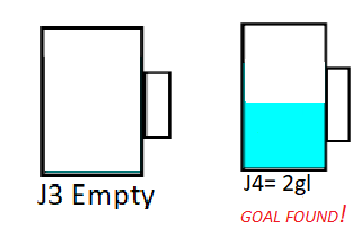

In [35]:
#import images required

j4_full = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J4_Full.png')
j4_empty=mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J4_Empty.png')
j4_3gl = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J4_3gl.png')
j4_2gl = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J4_2gl.png')
j4_1gl = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J4_1gl.png')
j3_full = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J3_Full_pump.png')
j3_empty = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/J3_Empty.png')
j3_2gl = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/jug3_2gl.png')
j3_1gl = mpimg.imread('http://www.cs.colostate.edu/~pswarade/pratik_imp/jug3_1gl.png')

#iterate over list of lists
for path in path_deeping_search:
        if(path[0]==0): 
            plt.figure(1)
            ax=plt.subplot(1,2,1)
           # ax.set_title('J3')
            plt.axis('off')
            plt.imshow(j3_empty)
          
        if(path[0]==3):    
            plt.subplot(1,2,1)    
            plt.axis('off')    
            plt.imshow(j3_full)
           # display.clear_output(wait=True)
        if(path[0]==2):    
            plt.subplot(1,2,1)    
            plt.axis('off')    
            plt.imshow(j3_2gl)
           # display.clear_output(wait=True)
        if(path[0]==1):    
            plt.subplot(1,2,1)    
            plt.axis('off')    
            plt.imshow(j3_1gl)
           # display.clear_output(wait=True)       
            
        if(path[1]==4):    
            plt.subplot(1,2,2)    
            plt.axis('off')    
            plt.imshow(j4_full)
           # display.clear_output(wait=True)
        if(path[1]==0):    
            plt.subplot(1,2,2)    
            plt.axis('off')    
            plt.imshow(j4_empty)
            #display.clear_output(wait=True)
        if(path[1]==3):    
            plt.subplot(1,2,2)    
            plt.axis('off')    
            plt.imshow(j4_3gl)
           # display.clear_output(wait=True)
        if(path[1]==2):    
            plt.subplot(1,2,2)    
            plt.axis('off')    
            plt.imshow(j4_2gl)
            display.clear_output(wait=True)
        if(path[1]==1):    
            plt.subplot(1,2,2)    
            plt.axis('off')    
            plt.imshow(j4_1gl)
           # display.clear_output(wait=True)
        
        display.display(pl.gcf())    
        time.sleep(2)
        display.clear_output(wait=True)
        plt.show()        
        #display.clear_output(wait=True)
        time.sleep(2)
        
    
    


## Conclusion : 
   Looking on solution path generated from both the problem above we can conclude that
*  DLS can be used when the there is a prior knowledge to the problem, which is always not the case, Typically, we   will not      know the depth of the shallowest goal of a problem unless we solved this problem before.

* Also, IDS is a hybrid search strategy between BFS and DFS inheriting their advantages.
 IDS is faster than BFS and DFS.It is said that “IDS is the preferred uniformed search method when there is a large search space   and the depth of the solution is not known”

In [28]:
%run -i A2graderfinal.py

AttributeError: module 'signal' has no attribute 'SIGALRM'

In [37]:

g = 0

for func in ['iterativeDeepeningSearch', 'depthLimitedSearch',
             'findBlank_8p', 'actionsF_8p', 'takeActionF_8p', 'printPath_8p']:
    if func not in dir() or not callable(globals()[func]):
        print('CRITICAL ERROR: Function named \'{}\' is not defined'.format(func))
        print('  Check the spelling and capitalization of the function name.')

seconds = 60 * 5

succs = {'a': ['b', 'z', 'd'], 'b':['a'], 'e':['z'], 'd':['y'], 'y':['z'], 'z':['g']}
print('\nSearching this graph:\n', succs)
def aF(state):
    return copy.copy(succs.get(state,[]))
def tAF(state, action):
    return action
print('\nLooking for path from a to g with max depth of 1.')

#signal.alarm(seconds)
try:
    path = iterativeDeepeningSearch('a', 'g', aF, tAF, 1)
    if type(path) == str and path.lower() == 'cutoff':
        g += 5
        print(' 5/ 5 points. Your search correctly returned', path)
    else:
        print(' 0/ 5 points. Your search should have returned ''cutoff''. You returned', path)

except TimeoutException:
    print('0/5 points. Your iterativeDeepeningSearch did not terminate in', seconds/60, 'minutes.')

except Exception:
    print('0/5 points. Your iterativeDeepeningSearch raised an exception.')


print('\nLooking for path from a to g with max depth of 5.')

try:
    path = iterativeDeepeningSearch('a', 'g', aF, tAF, 5)
    if path == ['a', 'z', 'g']:
        g += 10
        print('10/10 points. Your search correctly returned', path)
    else:
        print(' 0/10 points. Your search should have returned', ['a', 'g'])

except TimeoutException:
    print('0/10 points. Your iterativeDeepeningSearch did not terminate in', seconds/60, 'minutes.')

except Exception:
    print('0/10 points. Your iterativeDeepeningSearch raised an exception.')
    


print('\nTesting findBlank_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])')
r, c = findBlank_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])
if r == 2 and c == 1:
    g += 5
    print('5/5 points. Your findBlank_8p correctly returned', r, c)
else:
    print('0/5 points. Your findBlank_8p should have returned 2 1 but you returned', r, c)

print('\nTesting actionsF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])')
acts = actionsF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])
correct = ['left', 'right', 'up']
if acts == correct:
    g += 5
    print('5/5 points. Your actionsF_8p correctly returned', acts)
else:
    print('0/5 points. Your actionsF_8p should have returned', correct, 'but you returned', acts)

print('\nTesting takeActionF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8],\'up\')')
s = takeActionF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8],'up')
correct = [1, 2, 3, 4, 0, 6, 7, 5, 8]
if s == correct:
    g += 5
    print('5/5 points. Your takeActionsF_8p correctly returned', s)
else:
    print('0/5 points. Your takeActionsF_8p should have returned', correct, 'but you returned', s)


print('\nTesting iterativeDeepeningSearch([1, 2, 3, 4, 5, 6, 7, 0, 8],[0, 2, 3, 1, 4,  6, 7, 5, 8], actionsF_8p, takeActionF_8p, 5)')

try:
    path = iterativeDeepeningSearch([1, 2, 3, 4, 5, 6, 7, 0, 8],[0, 2, 3, 1, 4,  6, 7, 5, 8], actionsF_8p, takeActionF_8p, 5)
    correct = [[1, 2, 3, 4, 5, 6, 7, 0, 8], [1, 2, 3, 4, 0, 6, 7, 5, 8], [1, 2, 3, 0, 4, 6, 7, 5, 8], [0, 2, 3, 1, 4, 6, 7, 5, 8]]
    if path == correct:
        g += 20
        print('20/20 points. Your search correctly returned', path)
    else:
        print('0/20 points. Your search should have returned', correct, 'but you returned', path)

except TimeoutException:
    print('0/20 points. Your iterativeDeepeningSearch did not terminate in', seconds/60, 'minutes.')

except Exception:
    print('0/20 points. Your iterativeDeepeningSearch raised an exception.')
    

print('\nTesting iterativeDeepeningSearch([5, 2, 8, 0, 1, 4, 3, 7, 6], [0, 2, 3, 1, 4,  6, 7, 5, 8], actionsF_8p, takeActionF_8p, 10)')
#signal.alarm(seconds)
try:
    path = iterativeDeepeningSearch([5, 2, 8, 0, 1, 4, 3, 7, 6],[0, 2, 3, 1, 4,  6, 7, 5, 8], actionsF_8p, takeActionF_8p, 10)
    if type(path) == str and path.lower() == 'cutoff':
        g += 20
        print('20/20 points. Your search correctly returned', path)
    else:
        print('0/20 points. Your search should have returned ''cutoff'', but you returned', path)

except TimeoutException:
    print('0/20 points. Your iterativeDeepeningSearch did not terminate in', seconds/60, 'minutes.')

except Exception:
    print('0/20 points. Your iterativeDeepeningSearch raised an exception.')


print('\nTesting iterativeDeepeningSearch([0, 1, 5, 4, 3, 8, 6, 2, 7], [1, 2, 3, 4, 0, 5, 6, 7, 8], actionsF_8p, takeActionF_8p, 15)')

try:
    path = iterativeDeepeningSearch(
        [0, 1, 5, 4, 3, 8, 6, 2, 7],
        [1, 2, 3, 4, 0, 5, 6, 7, 8], actionsF_8p, takeActionF_8p, 15)
    if type(path) == list and len(path) == 9:
        g += 20
        print('20/20 points. Your search correctly returned', path)
    else:
        print('0/20 points. Your search should have returned a path of length 9')

except TimeoutException:
    print('0/20 points. Your iterativeDeepeningSearch did not terminate in', seconds/60, 'minutes.')

except Exception:
    print('0/20 points. Your iterativeDeepeningSearch raised an exception.')
import os    
name = os.getcwd().split('/')[-1]
print('\n{} Grade is {}/90'.format(name, g))
print('\n{} SECOND search problem grade is __/10'.format(name))
print('\n{} FINAL GRADE is __/100'.format(name))







Searching this graph:
 {'a': ['b', 'z', 'd'], 'b': ['a'], 'e': ['z'], 'd': ['y'], 'y': ['z'], 'z': ['g']}

Looking for path from a to g with max depth of 1.
 5/ 5 points. Your search correctly returned cutoff

Looking for path from a to g with max depth of 5.
10/10 points. Your search correctly returned ['a', 'z', 'g']

Testing findBlank_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])
5/5 points. Your findBlank_8p correctly returned 2 1

Testing actionsF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8])
5/5 points. Your actionsF_8p correctly returned ['left', 'right', 'up']

Testing takeActionF_8p([1, 2, 3, 4, 5, 6, 7, 0, 8],'up')
5/5 points. Your takeActionsF_8p correctly returned [1, 2, 3, 4, 0, 6, 7, 5, 8]

Testing iterativeDeepeningSearch([1, 2, 3, 4, 5, 6, 7, 0, 8],[0, 2, 3, 1, 4,  6, 7, 5, 8], actionsF_8p, takeActionF_8p, 5)
20/20 points. Your search correctly returned [[1, 2, 3, 4, 5, 6, 7, 0, 8], [1, 2, 3, 4, 0, 6, 7, 5, 8], [1, 2, 3, 0, 4, 6, 7, 5, 8], [0, 2, 3, 1, 4, 6, 7, 5, 8]]

Testing iterativeDeepeningS